<a href="https://colab.research.google.com/github/akshaychatterjee07/MACHINE-LEARNING-MAJOR-PROJECT2/blob/main/Fruit_Classification_TensorFlow_Model_for_Android_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip fruits.zip


Archive:  fruits.zip
  inflating: fruits/.DS_Store        
   creating: fruits/test/
  inflating: fruits/test/.DS_Store   
   creating: fruits/test/apple/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.25.54 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.05 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.13 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.19 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.24 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.29 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.36 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.41 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.47 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.52 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.58 PM.png  
  inflating: fruits/test/apple/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 511 files belonging to 4 classes.
Found 130 files belonging to 4 classes.
Found 153 files belonging to 4 classes.


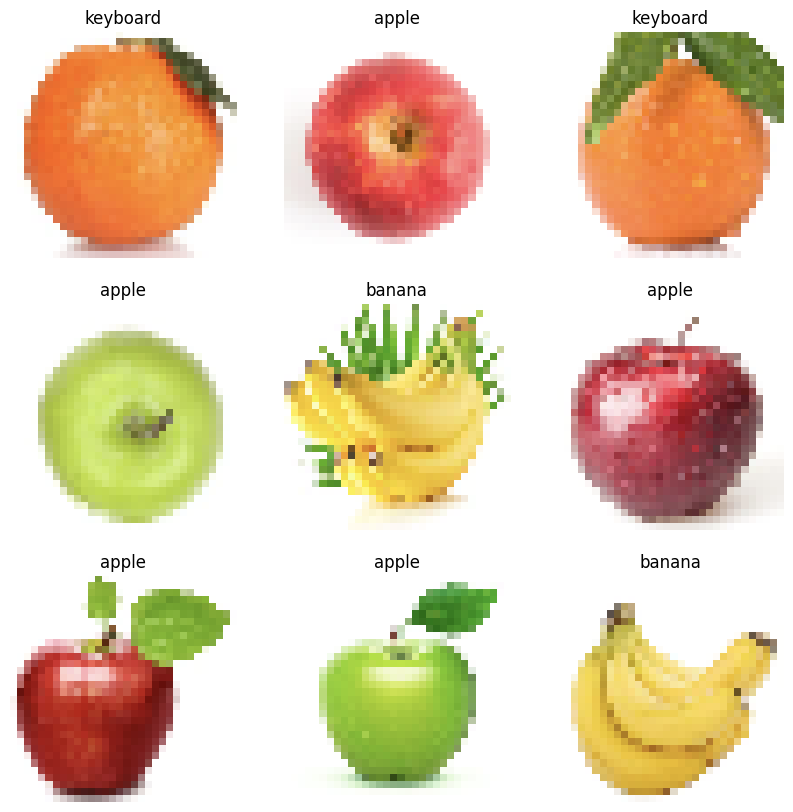

In [ ]:
class_names = ["apple", "banana", "orange","keyboard"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
26/26 [==============================] - 3s 47ms/step - loss: nan - accuracy: 0.2994 - val_loss: nan - val_accuracy: 0.1769
Epoch 2/10
26/26 [==============================] - 2s 49ms/step - loss: nan - accuracy: 0.3170 - val_loss: nan - val_accuracy: 0.1769
Epoch 3/10
26/26 [==============================] - 2s 46ms/step - loss: nan - accuracy: 0.3170 - val_loss: nan - val_accuracy: 0.1769
Epoch 4/10
26/26 [==============================] - 2s 79ms/step - loss: nan - accuracy: 0.3170 - val_loss: nan - val_accuracy: 0.1769
Epoch 5/10
26/26 [==============================] - 3s 74ms/step - loss: nan - accuracy: 0.3170 - val_loss: nan - val_accuracy: 0.1769
Epoch 6/10
26/26 [==============================] - 2s 45ms/step - loss: nan - accuracy: 0.3170 - val_loss: nan - val_accuracy: 0.1769
Epoch 7/10
26/26 [==============================] - 2s 45ms/step - loss: nan - accuracy: 0.3170 - val_loss: nan - val_accuracy: 0.1769
Epoch 8/10
26/26 [==============================] - 2s 

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 1s 24ms/step - loss: nan - accuracy: 0.3072


[nan, 0.30718955397605896]

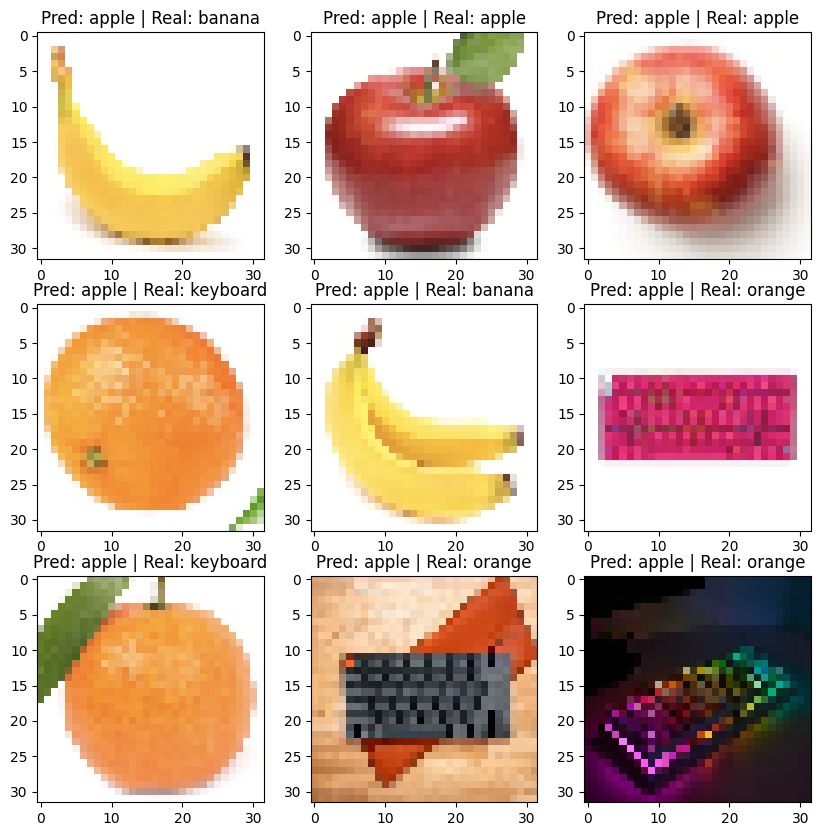

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)


In [ ]:
!pip install tensorflow==2.9.1
!pip install tensorflowjs


# tensorflowjs_converter --input_format=tf_lite --output_format=tfjs_graph_model /content/model.tflite /content

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 68.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: te

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 116.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!tensorflowjs_converter --input_format=tf_lite --output_format=tfjs_graph_model model.tflite /content/tfjs_model


2024-05-26 15:59:48.218023: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 15:59:49.694128: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: TensorFlow.js model converters. [-h]
                                       [--input_format {tf_frozen_model,keras,keras_keras,tf_hub,keras_saved_model,tf_saved_model,tfjs_layers_model}]
                                       [--output_format {tfjs_graph_model,keras,keras_keras,keras_saved_model,tfjs_layers_model}]
                                       [--signature_name SIGNATURE_NAME]
                                       [--saved_model_tags SAVED_MODEL_TAGS]
                                       [--quantize_float16 [QUANTIZE_FLOAT16]]
   

In [ ]:
tensorflowjs_converter --input_format=tf_lite --output_format=tfjs_graph_model /content/model.tflite /content


SyntaxError: cannot assign to expression (<ipython-input-2-bf825900c085>, line 1)